In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import linear_model

In [2]:
# https://www.kaggle.com/tunguz/deep-solar-dataset
df_all = pd.read_csv('deepsolar_tract.csv', encoding='latin-1')

In [3]:
for col in df_all.columns:
    try:
        pd.to_numeric(df_all[col])
    except:
        print(col)

# df = df_all#.dropna()

county
state
electricity_price_transportation


In [6]:
df = df_all.loc[:, ~(df_all.columns).isin(['voting_2012_dem_percentage', 'voting_2012_gop_percentage'])]
df =df.dropna()
df = df[df[target]<1200]

In [125]:
#df_all.isnull().sum()/len(df_all)*100

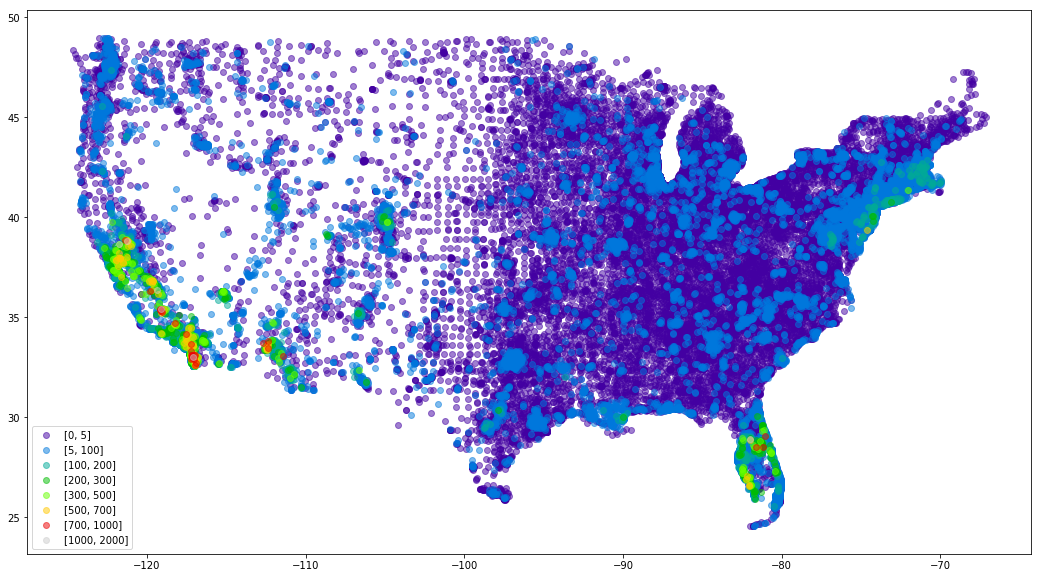

In [5]:
# 4.) Analyze target variable: map, ordered scatter plot
target = 'solar_system_count_residential'

cmap = plt.cm.get_cmap('nipy_spectral')
intervals = [[0,5],[5,100], [100, 200],[200,300],[300, 500], [500, 700], [700, 1000], [1000, 2000] ]

fig, ax = plt.subplots(figsize = [18,10])
for ct_ind, ct in enumerate(intervals):
    rgba = cmap((ct_ind +1)*1/len(intervals) )
    plt.scatter(df[(df[target]>=ct[0]) &(df[target]<ct[1])].lon, df[(df[target]>=ct[0]) &(df[target]<ct[1])].lat,c = rgba, alpha = .5, label = ct)

plt.legend()
# plt.gca().set_aspect('equal', adjustable='box')

In [7]:
# Create some variables
df['income_per_area_residential'] = df['average_household_income']*df['household_count'].div(df.land_area)
df['household_density'] = df['household_count'].div(df.land_area)
df['education_higher_ed'] = (df['education_bachelor'] + df['education_doctoral'] + df['education_master'] + df['education_professional_school'])
df['house_val_rel_to_med_income'] = df['housing_unit_median_value'].div(df.median_household_income)

In [8]:
min(df.house_val_rel_to_med_income), max(df.house_val_rel_to_med_income)

(0.2574341546304163, 80.74613428075416)

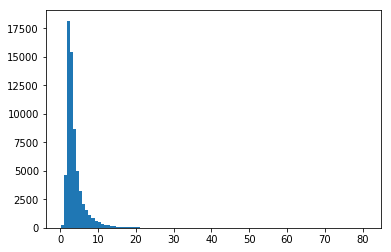

In [9]:
n, bins, patches = plt.hist(df.house_val_rel_to_med_income, 100)

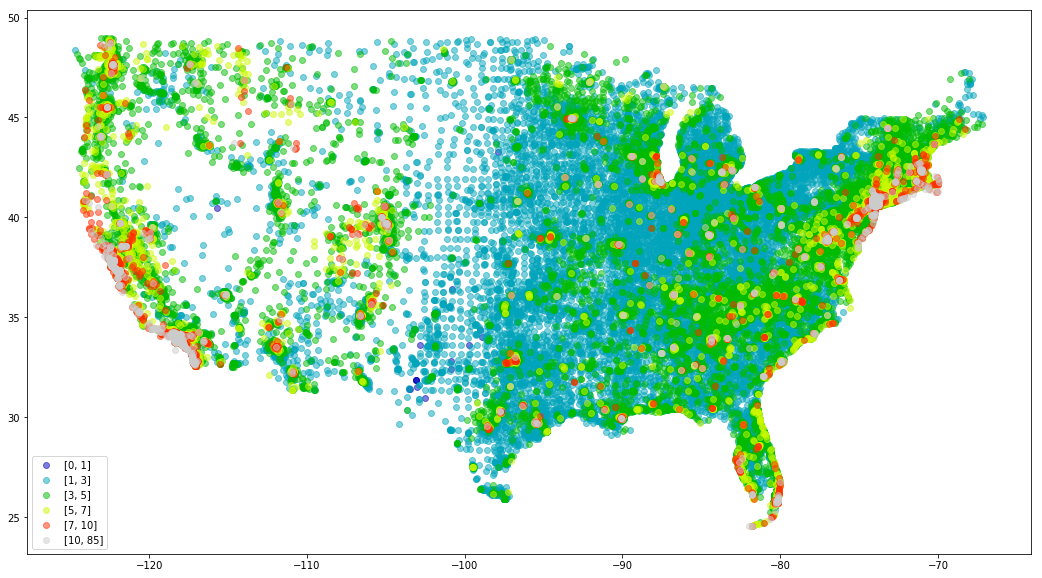

In [10]:
# 4.) Analyze target variable: map, ordered scatter plot
target = 'solar_system_count_residential'

cmap = plt.cm.get_cmap('nipy_spectral')
intervals = [[0,1],[1,3], [3, 5],[5,7],[7, 10], [10, 85]]

fig, ax = plt.subplots(figsize = [18,10])
for ct_ind, ct in enumerate(intervals):
    rgba = cmap((ct_ind +1)*1/len(intervals) )
    plt.scatter(df[(df['house_val_rel_to_med_income']>=ct[0]) &(df['house_val_rel_to_med_income']<ct[1])].lon, df[(df['house_val_rel_to_med_income']>=ct[0]) &(df['house_val_rel_to_med_income']<ct[1])].lat,c = rgba, alpha = .5, label = ct)

plt.legend()
# plt.gca().set_aspect('equal', adjustable='box')

In [11]:
print('Number of residential solar systems identified by image analysis:', sum(df[target]))
print('Number of census tracts without any identified solar systems:', len(df[df[target]>0]))
print('Greatest number of solar systems identified in a single tract:', max(df[target]), '(',df[df[target] == max(df[target])]['county'],',',df[df[target] == max(df[target])]['state'] ,')')
print('Percentage of households with solar systems:', 100*sum(df[target])/sum(df['household_count']))

Number of residential solar systems identified by image analysis: 1185389.0
Number of census tracts without any identified solar systems: 47590
Greatest number of solar systems identified in a single tract: 1119.0 ( 39808    Sumter County
Name: county, dtype: object , 39808    fl
Name: state, dtype: object )
Percentage of households with solar systems: 1.1369872372813574


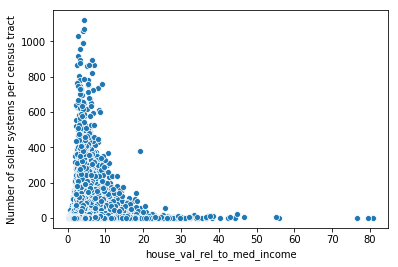

In [12]:
ax = sns.scatterplot(x = df.house_val_rel_to_med_income, y = df[target].sort_values())
ax.set_ylabel('Number of solar systems per census tract')

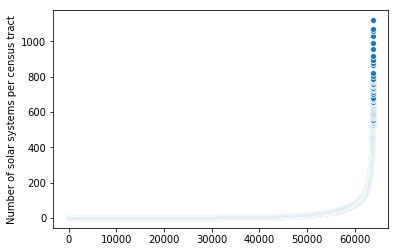

In [13]:
ax = sns.scatterplot(x = [ik for ik in range(len(df))], y = df[target].sort_values())
ax.set_ylabel('Number of solar systems per census tract')

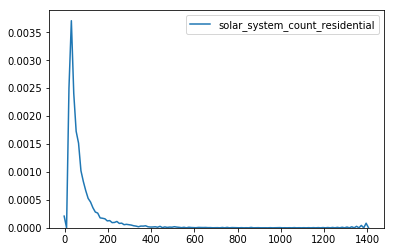

In [76]:
sns.kdeplot(df[target])

In [14]:
# 1.) pull out columns that contain strings, solar variables (except target), nonresidential variables

misc = ['Unnamed: 0','fips', 'county', 'state']
solar = ['total_panel_area',  'total_panel_area_residential', 'total_panel_area_nonresidential',  
                   'solar_panel_area_divided_by_area', 'solar_panel_area_per_capita',
                'tile_count','tile_count_residential', 'tile_count_nonresidential','number_of_solar_system_per_household', 
                   'solar_system_count','solar_system_count_nonresidential']
non_residential = ['electricity_price_transportation','incentive_count_nonresidential',
                   'electricity_consume_commercial','electricity_price_overall', 'electricity_consume_industrial', 
                   'electricity_consume_total','electricity_price_industrial','electricity_price_commercial']

df = df.loc[:, ~(df.columns).isin(misc + solar + non_residential)]


In [ ]:
# Analyze distributions of key variables

In [ ]:
# .) Try to characterize relationships between logically related variables 

In [15]:
X = df#.loc[:, ~(df.columns).isin([target])]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [16]:
variances = X_train.var()
var_df = pd.DataFrame({'cols': X_train.columns, 'variances': variances})
var_df.sort_values('variances', ascending=False)

,cols,variances
income_per_area_residential,income_per_area_residential,2.620757e+17
housing_unit_median_value,housing_unit_median_value,3.882891e+10
average_household_income,average_household_income,1.340409e+09
median_household_income,median_household_income,7.859857e+08
per_capita_income,per_capita_income,2.138252e+08
population_density,population_density,1.253165e+08
household_density,household_density,2.056373e+07
population,population,4.328347e+06
race_white,race_white,3.540378e+06
education_population,education_population,1.845732e+06


In [17]:
small_var = []
for var_ind, var in enumerate(variances):
    if var<10:
        small_var.append(variances.index[var_ind])


In [110]:
# 2.) Next, scale data

In [23]:
def split_scale_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    sclr = StandardScaler()
    sclr.fit(X_train[X_train.columns])

    X_train_scaled = pd.DataFrame(sclr.transform(X_train[X_train.columns]), columns = X_train.columns)
    X_test_scaled = pd.DataFrame(sclr.transform(X_test[X_test.columns]), columns = X_test.columns)

    y_train_scaled = X_train_scaled[target]
    X_train_scaled = X_train_scaled.loc[:, ~(X_train_scaled.columns).isin([target])]

    y_test_scaled = X_test_scaled[target]
    X_test_scaled = X_test_scaled.loc[:, ~(X_test_scaled.columns).isin([target])]
    
    return X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, sclr

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  import sys
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  


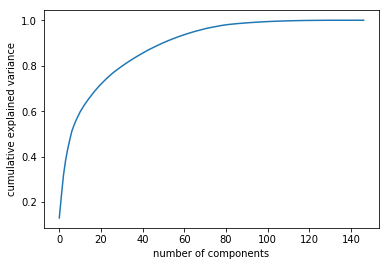

In [19]:
# 3.) Run PCA and look at which features contribute most variance

X = df#.loc[:, ~(df.columns).isin([target])]
y = df[target]

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = split_scale_data(X, y)

pca = PCA().fit(X_train_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [20]:
pca = PCA(n_components=100)
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
labels = ['PC-'+str(ik) for ik in range(100)]
pca_components = pd.DataFrame(pca.components_,columns=X_train_scaled.columns,index = labels)

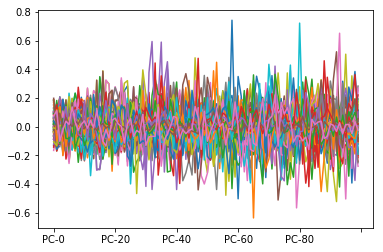

In [177]:
for col in pca_components.columns:
    pca_components[col].plot()

In [96]:
edu_omit = ['education_bachelor','education_college','education_doctoral','education_high_school_graduate','education_less_than_high_school','education_master','education_professional_school']
race_omit = ['race_asian','race_black_africa','race_indian_alaska','race_islander','race_other','race_two_more','race_white', 'race_indian_alaska_rate','race_two_more_rate']
heat_fuel_omit = ['heating_fuel_coal_coke','heating_fuel_electricity','heating_fuel_fuel_oil_kerosene','heating_fuel_gas','heating_fuel_housing_unit_count',
'heating_fuel_none','heating_fuel_other','heating_fuel_solar', 'heating_fuel_solar_rate']


edu_rate_omit = ['education_bachelor_rate','education_college_rate','education_doctoral_rate','education_high_school_graduate_rate','education_less_than_high_school_rate','education_master_rate','education_professional_school_rate']
race_rate_omit = ['race_asian_rate','race_black_africa_rate','race_indian_alaska_rate','race_islander_rate','race_other_rate','race_two_more_rate','race_white_rate','race_indian_alaska','race_two_more']
heat_fuel_rate_omit = ['heating_fuel_coal_coke_rate','heating_fuel_electricity_rate','heating_fuel_fuel_oil_kerosene_rate','heating_fuel_gas_rate','heating_fuel_housing_unit_count_rate',
'heating_fuel_none_rate','heating_fuel_other_rate','heating_fuel_solar_rate', 'heating_fuel_solar']



In [ ]:
# 5.) Consider model options: Linear Regression, Random Forest Regression, SVM-R, Gradient Boosting Regression

In [ ]:
import time
from sklearn.svm import SVR
d_model = {'lin_reg': linear_model.LinearRegression(), 'lasso': linear_model.Lasso(), 'ridge': linear_model.Ridge(), 'svr': SVR(), 'clf': clf.best_estimator_}
d_data = {}
d_results = {ik: {model:{} for model in d_model.keys()} for ik in range(5)}
# d_results = {model: {ik:{} for ik in range(5)} for model in d_model.keys()}



In [ ]:
for ik in range(5):
    X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, sclr = split_scale_data(X, y)
    pca = PCA(n_components=100)
    pca.fit(X_train_scaled)
    d_train_test_scale_pca[ik] = {'X_train_scaled':X_train_scaled, 'X_test_scaled':X_test_scaled, 
                              'y_train_scaled':y_train_scaled, 'y_test_scaled':y_test_scaled,
                              'sclr': sclr, 'pca':pca}

## 0

In [ ]:
ik = 0
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, sclr = split_scale_data(X, y)
pca = PCA(n_components=100)
pca.fit(X_train_scaled)
d_train_test_scale_pca[ik] = {'X_train_scaled':X_train_scaled, 'X_test_scaled':X_test_scaled, 
                              'y_train_scaled':y_train_scaled, 'y_test_scaled':y_test_scaled,
                              'sclr': sclr, 'pca':pca}

for model in d_model.keys():
    print(model)
    model_inst = d_model[model]
    start_fit = time.time()
    model_inst.fit(pca.transform(X_train_scaled), y_train_scaled)
    end_fit = time.time()
    start_cv = time.time()
    cross_val_scores = cross_val_score(model_inst, pca.transform(X_train_scaled),y_train_scaled, cv = 10 )
    end_cv = time.time()
    start_pred = time.time()
    preds = model_inst.predict(pca.transform(X_test_scaled))
    end_pred = time.time()
    test_score = model_inst.score(pca.transform(X_test_scaled), y_test_scaled)
    print('cross_val_scores', cross_val_scores, 'test score:', test_score)
    d_results[ik][model] = {'model_handle': model, 'model': model_inst, 
                            'train_time': end_fit-start_fit,
                            'cv_scores': cross_val_scores, 'cv_avg': np.mean(cross_val_scores), 'cv_std': np.std(cross_val_scores), 'cv_time': end_cv-start_cv,
                            'preds': preds, 'pred_time': end_pred-start_pred, 
                            'test_score': test_score}

    
    

## 1

In [ ]:
ik = 1
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, sclr = split_scale_data(X, y)
pca = PCA(n_components=100)
pca.fit(X_train_scaled)
d_train_test_scale_pca[ik] = {'X_train_scaled':X_train_scaled, 'X_test_scaled':X_test_scaled, 
                              'y_train_scaled':y_train_scaled, 'y_test_scaled':y_test_scaled,
                              'sclr': sclr, 'pca':pca}

for model in d_model.keys():
    print(model)
    model_inst = d_model[model]
    start_fit = time.time()
    model_inst.fit(pca.transform(X_train_scaled), y_train_scaled)
    end_fit = time.time()
    start_cv = time.time()
    cross_val_scores = cross_val_score(model_inst, pca.transform(X_train_scaled),y_train_scaled, cv = 10 )
    end_cv = time.time()
    start_pred = time.time()
    preds = model_inst.predict(pca.transform(X_test_scaled))
    end_pred = time.time()
    test_score = model_inst.score(pca.transform(X_test_scaled), y_test_scaled)
    print('cross_val_scores', cross_val_scores, 'test score:', test_score)
    d_results[ik][model] = {'model_handle': model, 'model': model_inst, 
                            'train_time': end_fit-start_fit,
                            'cv_scores': cross_val_scores, 'cv_avg': np.mean(cross_val_scores), 'cv_std': np.std(cross_val_scores), 'cv_time': end_cv-start_cv,
                            'preds': preds, 'pred_time': end_pred-start_pred, 
                            'test_score': test_score}

    
    

## 2

In [ ]:
ik = 2
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, sclr = split_scale_data(X, y)
pca = PCA(n_components=100)
pca.fit(X_train_scaled)
d_train_test_scale_pca[ik] = {'X_train_scaled':X_train_scaled, 'X_test_scaled':X_test_scaled, 
                              'y_train_scaled':y_train_scaled, 'y_test_scaled':y_test_scaled,
                              'sclr': sclr, 'pca':pca}

for model in d_model.keys():
    print(model)
    model_inst = d_model[model]
    start_fit = time.time()
    model_inst.fit(pca.transform(X_train_scaled), y_train_scaled)
    end_fit = time.time()
    start_cv = time.time()
    cross_val_scores = cross_val_score(model_inst, pca.transform(X_train_scaled),y_train_scaled, cv = 10 )
    end_cv = time.time()
    start_pred = time.time()
    preds = model_inst.predict(pca.transform(X_test_scaled))
    end_pred = time.time()
    test_score = model_inst.score(pca.transform(X_test_scaled), y_test_scaled)
    print('cross_val_scores', cross_val_scores, 'test score:', test_score)
    d_results[ik][model] = {'model_handle': model, 'model': model_inst, 
                            'train_time': end_fit-start_fit,
                            'cv_scores': cross_val_scores, 'cv_avg': np.mean(cross_val_scores), 'cv_std': np.std(cross_val_scores), 'cv_time': end_cv-start_cv,
                            'preds': preds, 'pred_time': end_pred-start_pred, 
                            'test_score': test_score}

    
    

## 3

In [ ]:
ik = 3
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, sclr = split_scale_data(X, y)
pca = PCA(n_components=100)
pca.fit(X_train_scaled)
d_train_test_scale_pca[ik] = {'X_train_scaled':X_train_scaled, 'X_test_scaled':X_test_scaled, 
                              'y_train_scaled':y_train_scaled, 'y_test_scaled':y_test_scaled,
                              'sclr': sclr, 'pca':pca}

for model in d_model.keys():
    print(model)
    model_inst = d_model[model]
    start_fit = time.time()
    model_inst.fit(pca.transform(X_train_scaled), y_train_scaled)
    end_fit = time.time()
    start_cv = time.time()
    cross_val_scores = cross_val_score(model_inst, pca.transform(X_train_scaled),y_train_scaled, cv = 10 )
    end_cv = time.time()
    start_pred = time.time()
    preds = model_inst.predict(pca.transform(X_test_scaled))
    end_pred = time.time()
    test_score = model_inst.score(pca.transform(X_test_scaled), y_test_scaled)
    print('cross_val_scores', cross_val_scores, 'test score:', test_score)
    d_results[ik][model] = {'model_handle': model, 'model': model_inst, 
                            'train_time': end_fit-start_fit,
                            'cv_scores': cross_val_scores, 'cv_avg': np.mean(cross_val_scores), 'cv_std': np.std(cross_val_scores), 'cv_time': end_cv-start_cv,
                            'preds': preds, 'pred_time': end_pred-start_pred, 
                            'test_score': test_score}

    
    

## 4

In [ ]:
ik = 4
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, sclr = split_scale_data(X, y)
pca = PCA(n_components=100)
pca.fit(X_train_scaled)
d_train_test_scale_pca[ik] = {'X_train_scaled':X_train_scaled, 'X_test_scaled':X_test_scaled, 
                              'y_train_scaled':y_train_scaled, 'y_test_scaled':y_test_scaled,
                              'sclr': sclr, 'pca':pca}

for model in d_model.keys():
    print(model)
    model_inst = d_model[model]
    start_fit = time.time()
    model_inst.fit(pca.transform(X_train_scaled), y_train_scaled)
    end_fit = time.time()
    start_cv = time.time()
    cross_val_scores = cross_val_score(model_inst, pca.transform(X_train_scaled),y_train_scaled, cv = 10 )
    end_cv = time.time()
    start_pred = time.time()
    preds = model_inst.predict(pca.transform(X_test_scaled))
    end_pred = time.time()
    test_score = model_inst.score(pca.transform(X_test_scaled), y_test_scaled)
    print('cross_val_scores', cross_val_scores, 'test score:', test_score)
    d_results[ik][model] = {'model_handle': model, 'model': model_inst, 
                            'train_time': end_fit-start_fit,
                            'cv_scores': cross_val_scores, 'cv_avg': np.mean(cross_val_scores), 'cv_std': np.std(cross_val_scores), 'cv_time': end_cv-start_cv,
                            'preds': preds, 'pred_time': end_pred-start_pred, 
                            'test_score': test_score}

    
    

In [40]:
d_model_results= {model:{ik:{} for ik in d_results.keys()} for model in d_model.keys()}

for model in d_model.keys():
    for ik in d_results.keys():
        d_model_results[model][ik] = d_results[ik][model]

In [47]:
for model in d_model.keys():
    test_scores = []
    for ik in d_model_results[model].keys():
        test_scores.append(d_model_results[model][ik]['test_score'])
    d_model_results[model]['test_score_avg'] = np.mean(test_scores)
    d_model_results[model]['test_score_std'] = np.std(test_scores)

In [21]:
from sklearn import linear_model

lin_reg = linear_model.LinearRegression()
lin_reg.fit(pca.transform(X_train_scaled), y_train_scaled)
pred_lin_reg = lin_reg.predict(pca.transform(X_test_scaled))
print('lin_reg score:', lin_reg.score(pca.transform(X_test_scaled), y_test_scaled))

lasso = linear_model.Lasso()
lasso.fit(pca.transform(X_train_scaled), y_train_scaled)
pred_lasso_reg = lasso.predict(pca.transform(X_test_scaled))
print('lasso score:', lasso.score(pca.transform(X_test_scaled), y_test_scaled))

ridge = linear_model.Ridge()
ridge.fit(pca.transform(X_train_scaled), y_train_scaled)
pred_ridge_reg = ridge.predict(pca.transform(X_test_scaled))
print('ridge score:', ridge.score(pca.transform(X_test_scaled), y_test_scaled))

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


lin_reg score: 0.45222417882
lasso score: 0.0509032497874
ridge score: 0.452227177234


In [99]:
from sklearn.svm import SVR

params = {'kernel' :'rbf'}
svr = SVR(**params)
svr.fit(pca.transform(X_train_scaled), y_train_scaled)

preds = svr.predict(pca.transform(X_test_scaled))
svr.score(pca.transform(X_test_scaled), y_test_scaled)

/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.74098671220007795

In [101]:
from sklearn import ensemble

# Fit regression model
params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(pca.transform(X_train_scaled), y_train_scaled)
preds_clf = clf.predict(pca.transform(X_test_scaled))
clf.score(pca.transform(X_test_scaled), y_test_scaled)

0.76257850059570331

In [22]:
from sklearn import ensemble

# Fit regression model
params = {'n_estimators': 400, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(pca.transform(X_train_scaled), y_train_scaled)
preds_clf = clf.predict(pca.transform(X_test_scaled))
clf.score(pca.transform(X_test_scaled), y_test_scaled)

0.64066570542054768

In [ ]:
params = {'loss': ['ls', 'huber'], 
         'verbose': [1], 
          'criterion': ['friedman_mse', 'mae'],
          'max_depth':[3,6],
          'n_estimators':[400]}
         #'learning_rate': [.01, .1] ,
         #'subsample': [.6, 1],
         #'criterion': ['friedman_mse', 'mae'],
         #'max_depth': [2,3,6],
         #}

import time
start = time.time()
gbr = ensemble.GradientBoostingRegressor(**params)
clf = GridSearchCV(gbr, params, cv = 4, n_jobs= -1)
clf.fit(pca.transform(X_train_scaled), y_train_scaled)
score = clf.score(pca.transform(X_test_scaled), y_test_scaled)
print(clf.best_estimator_, score)
end = time.time()
total_time = end-start
print('total time:', total_time)

In [50]:
clf.__dict__

/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

{'best_estimator_': GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, n_iter_no_change=None, presort='auto',
              random_state=None, subsample=1.0, tol=0.0001,
              validation_fraction=0.1, verbose=1, warm_start=False),
 'best_index_': 0,
 'best_params_': {'loss': 'ls', 'verbose': 1},
 'best_score_': 0.55358038014764099,
 'cv': 4,
 'cv_results_': {'mean_fit_time': array([ 209.11881775,  217.04361528,  245.69594568]),
  'mean_score_time': array([ 0.13475281,  0.12178755,  0.17975783]),
  'mean_test_score': array([ 0.55358038,  0.30672345,  0.42380411]),
  'mean_train_score': array([ 0.6730449 ,  0.31277142,  0.44474552]),
  'param_loss': masked_array(data =

In [101]:
from sklearn import ensemble

# Fit regression model
params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(pca.transform(X_train_scaled), y_train_scaled)
preds_clf = clf.predict(pca.transform(X_test_scaled))
clf.score(pca.transform(X_test_scaled), y_test_scaled)

0.76257850059570331

In [154]:
X2 = df.loc[:, ~(df.columns).isin([target])]
y2 = df[target]

X_train, X_test, y_train, y_test= train_test_split(X2, y2)

clf2 = ensemble.GradientBoostingRegressor(**params)
clf2.fit(X_train, y_train)
preds_clf2 = clf2.predict(X_test)
clf2.score(X_test, y_test)


0.73025680430040729

In [156]:
cross_val_score(clf2, X_train, y_train)

/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([ 0.72585088,  0.73445397,  0.75743734])

In [103]:
rfr = ensemble.RandomForestRegressor(max_depth=6, random_state=0, n_estimators=100)
rfr.fit(pca.transform(X_train_scaled), y_train_scaled)
print(cross_val_score(rfr, pca.transform(X_train_scaled), y_train_scaled))

preds_rfr = rfr.predict(pca.transform(X_test_scaled))
rfr.score(pca.transform(X_test_scaled), y_test_scaled)

/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[ 0.56471359  0.58508041  0.56849524]


0.5962793518956

In [ ]:
# 6.) Optimize models with GridSearchCV

In [ ]:
# 7.) Consider different metrics 

In [ ]:
# 8.) Present final model with discussion of error